<a href="https://colab.research.google.com/github/SubramaniMokkala/python-projects/blob/main/Image_Classification_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Print dataset shapes
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3), Labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Labels shape: (10000, 1)


In [ ]:
# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

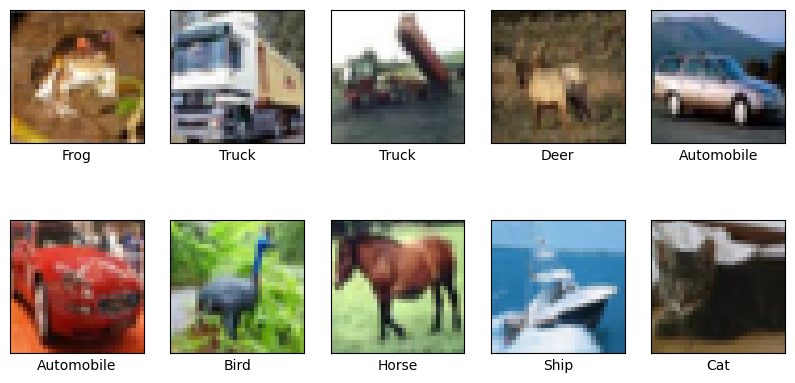

In [ ]:
# Plot a few training images with labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Verify normalization
print(f"Max pixel value after normalization: {x_train.max()}")
print(f"Min pixel value after normalization: {x_train.min()}")

Max pixel value after normalization: 1.0
Min pixel value after normalization: 0.0


In [ ]:
# Define the CNN model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # To prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Display model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2707 - loss: 1.9480 - val_accuracy: 0.4822 - val_loss: 1.4243
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4660 - loss: 1.4624 - val_accuracy: 0.5544 - val_loss: 1.2286
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5296 - loss: 1.3209 - val_accuracy: 0.5897 - val_loss: 1.1603
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5720 - loss: 1.2147 - val_accuracy: 0.6165 - val_loss: 1.0749
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5995 - loss: 1.1252 - val_accuracy: 0.6387 - val_loss: 1.0195
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6270 - loss: 1.0645 - val_accuracy: 0.6596 - val_loss: 0.9786
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6427 - loss: 1.0170 - val_accuracy: 0.6769 - val_loss: 0.9400
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6609 - loss: 0.9661 - val_accuracy: 0

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 - 1s - 4ms/step - accuracy: 0.6976 - loss: 0.8718
Test Accuracy: 0.70


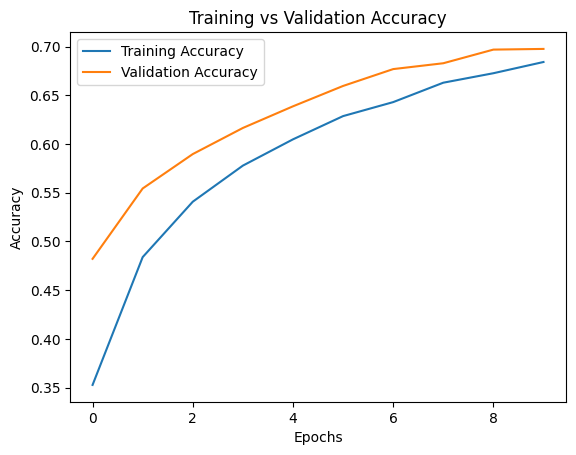

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

**Data Augumentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit generator to training data
datagen.fit(x_train)

# Train the model with augmented data
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6076 - loss: 1.1325 - val_accuracy: 0.6852 - val_loss: 0.9277
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.6222 - loss: 1.0965 - val_accuracy: 0.6804 - val_loss: 0.9302
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.6307 - loss: 1.0729 - val_accuracy: 0.6882 - val_loss: 0.9356
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.6415 - loss: 1.0331 - val_accuracy: 0.7061 - val_loss: 0.8453
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.6470 - loss: 1.0234 - val_accuracy: 0.7066 - val_loss: 0.8407
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6531 - loss: 1.0102 - val_accuracy: 0.7159 - val_loss: 0.8363
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6604 - loss: 0.9852 - val_accuracy: 0.7060 - val_loss: 0.8802
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6650 - loss: 0.9806 - val_accurac

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 - 1s - 2ms/step - accuracy: 0.7561 - loss: 0.7117
Test Accuracy: 0.76


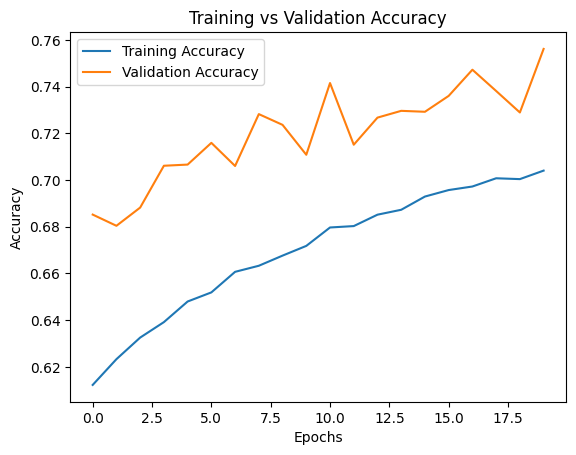

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [ ]:
# Save the model to a file
model.save('cifar10_transfer_learning_model.h5')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('cifar10_transfer_learning_model.h5')
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


In [ ]:
# Choose a random image from the test set
random_index = np.random.randint(0, len(x_test))  # Random index
img = x_test[random_index]  # Random image

In [ ]:
# Preprocess the image (resize and scale if necessary)
img_resized = np.expand_dims(img, axis=0)  # Add batch dimension
img_resized = img_resized / 255.0  # Normalize the image to [0, 1] range

In [ ]:
# Make a prediction using the trained model
predicted_class = model.predict(img_resized)
predicted_label = np.argmax(predicted_class)  # Get the predicted class label

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


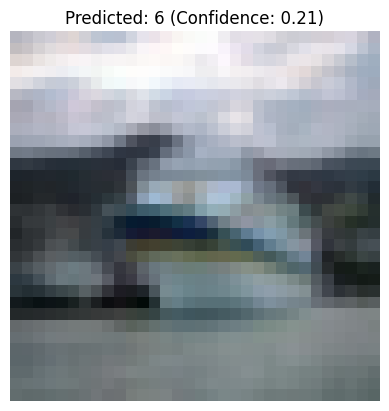

In [ ]:
# Display the image and its prediction
plt.imshow(x_test[random_index])
plt.title(f"Predicted: {predicted_label} (Confidence: {predicted_class[0][predicted_label]:.2f})")
plt.axis('off')
plt.show()